In [1]:
# importing Libraries
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score , r2_score

from sklearn.model_selection import GridSearchCV


In [2]:
# Read the data
data=pd.read_csv("insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Get the shape of data
data.shape

(1338, 7)

data.describe()

In [4]:
#finding the null values
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
# Droping the duplicate values.
data.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


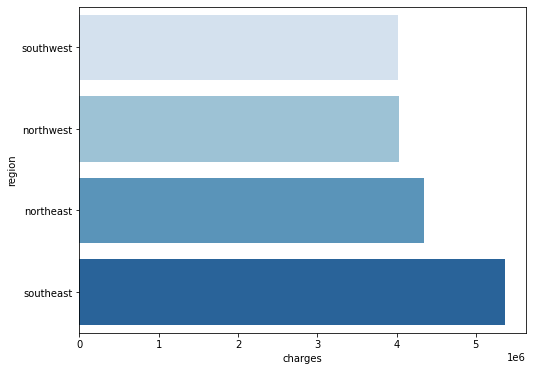

In [6]:
#In this graph we are calculating the sum of all the charges based on the regions
charges = data['charges'].groupby(data.region).sum().sort_values(ascending = True)
f, ax = plt.subplots(1, 1, figsize=(8, 6))
ax = sns.barplot(charges.head(), charges.head().index, palette='Blues')

Text(0.5, 1.0, 'countplot of age based on sex')

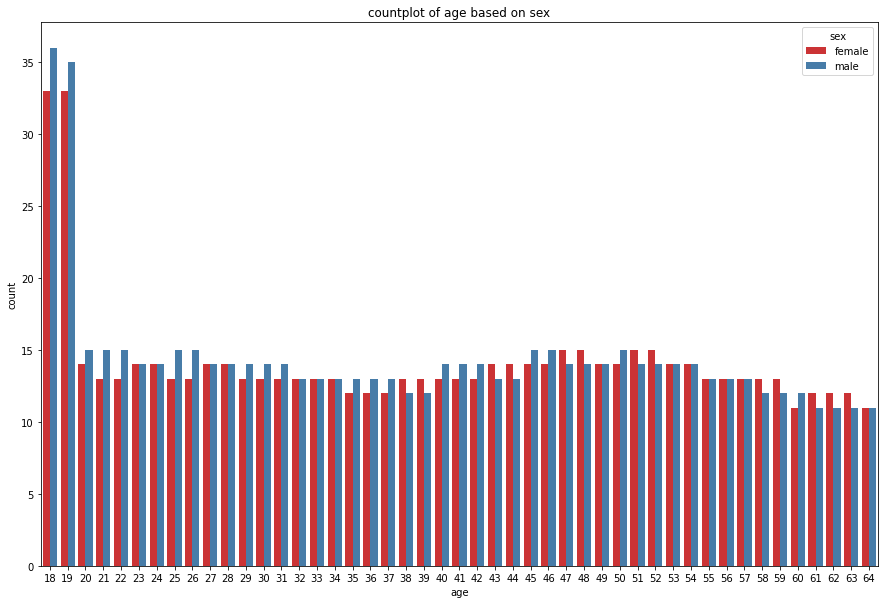

In [7]:
#In this graph we are counting the age based on the sex
f, ax = plt.subplots(1, 1, figsize=(15, 10))
sns.countplot(x='age',hue='sex',data=data,palette="Set1")
plt.title('countplot of age based on sex')

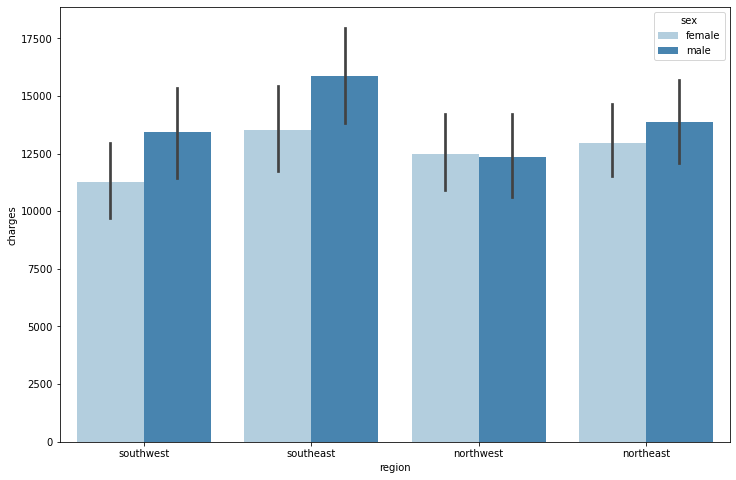

In [8]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='sex', data=data, palette='Blues')

In [9]:
#As sex and smoker are categorical applied labelEncoder to convert to numerical
label = LabelEncoder()
data['sex']= label.fit_transform(data['sex'])
data['smoker'] = label.fit_transform(data['smoker'])

In [10]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [11]:
#appling one hot encoding to convert the categorical to numerical
var= pd.get_dummies(data['region'])

In [12]:
#Appending the one hot encoded value to the original dataframe
data[['northeast','northwest','southeast']]=var[['northeast','northwest','southeast']]

In [13]:
data=data.drop('region',axis=1)

In [14]:
#as other column standarized between 0 and 1 so converting age,bmi in the range
sc = StandardScaler()
data[['age','bmi','charges']]=sc.fit_transform(data[['age','bmi','charges']])

In [15]:
#Seperating the features and label
x=data.drop('charges',axis=1)
y=data['charges']

In [16]:
#Spliting the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [17]:
# Extracting best parameter values of RandomForestRegressor by using GridSearchCV.

rfr_parameters = {'n_estimators' : [10, 20, 50, 100],
                  'max_depth' : [3, 5, 7, 9, 10]
                 }

grid_search_rfr = GridSearchCV(estimator = RandomForestRegressor(), 
                           param_grid = rfr_parameters,
                           cv = 10,
                           n_jobs = -1)

grid_search_rfr.fit(x_train, y_train)

rfr = grid_search_rfr.best_estimator_

In [18]:
# printing best parameter values.
print(rfr)

RandomForestRegressor(max_depth=3)


In [19]:
regressor = RandomForestRegressor(n_estimators= 50
                                  ,random_state=0, max_depth=3)
regressor.fit(x_train,y_train)

RandomForestRegressor(max_depth=3, n_estimators=50, random_state=0)

In [20]:
predict=regressor.predict(x_test)

In [21]:
# Checking MSE, RMSE and r2_Score
print(mean_squared_error(y_test, predict))
print(math.sqrt(mean_squared_error(y_test, predict)))
print(r2_score(y_test,predict))

0.1239073861393475
0.3520048098241663
0.8861366272134599


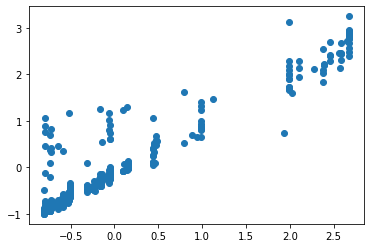

In [22]:
plt.scatter(predict,y_test)